In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving etq3.py to etq3.py
Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "etq3.py" with length 2235 bytes
User uploaded file "test.csv" with length 1781145 bytes
User uploaded file "train.csv" with length 11882477 bytes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

data = pd.read_csv("./train.csv")

print data

print data.describe()

print data.head()

print data.shape

print data.dtypes

print data.corr(method='pearson')


        MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  \
0       128  128   16     16     16     16     16    2    1    1     0     0   
1       128  128   16     16     16     16     16    2    1    1     0     0   
2       128  128   16     16     16     16     16    2    1    1     0     0   
3       128  128   16     16     16     16     16    2    1    1     0     1   
4       128  128   16     16     16     16     16    2    1    1     0     1   
5       128  128   16     16     16     16     16    2    1    1     0     1   
6       128  128   16     16     16     16     16    2    1    1     1     0   
7       128  128   16     16     16     16     16    2    1    1     1     0   
8       128  128   16     16     16     16     16    2    1    1     1     0   
9       128  128   16     16     16     16     16    2    1    1     1     0   
10      128  128   16     16     16     16     16    2    1    1     1     1   
11      128  128   16     16     16     

In [3]:
used_features = ["MWG","NWG","KWG","MDIMC","NDIMC","MDIMA","NDIMB","KWI","VWM","VWN","STRM","STRN","SA","SB"]

features = data[used_features]
target1 = data["Run1"]
target2 = data["Run2"]
target3 = data["Run3"]
target4 = data["Run4"]

print features
print target1
print target2
print target3
print target4

        MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  \
0       128  128   16     16     16     16     16    2    1    1     0     0   
1       128  128   16     16     16     16     16    2    1    1     0     0   
2       128  128   16     16     16     16     16    2    1    1     0     0   
3       128  128   16     16     16     16     16    2    1    1     0     1   
4       128  128   16     16     16     16     16    2    1    1     0     1   
5       128  128   16     16     16     16     16    2    1    1     0     1   
6       128  128   16     16     16     16     16    2    1    1     1     0   
7       128  128   16     16     16     16     16    2    1    1     1     0   
8       128  128   16     16     16     16     16    2    1    1     1     0   
9       128  128   16     16     16     16     16    2    1    1     1     0   
10      128  128   16     16     16     16     16    2    1    1     1     1   
11      128  128   16     16     16     

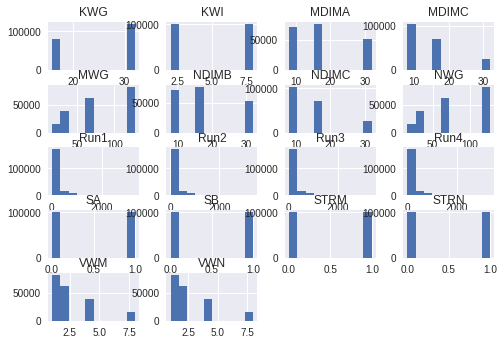

In [4]:
hist = data.hist()
plt.show()

feature_train1, feature_test1, target_train1, target_test1 = train_test_split(features, target1, test_size=0.2, random_state=42)

feature_train2, feature_test2, target_train2, target_test2 = train_test_split(features, target2, test_size=0.2, random_state=42)

feature_train3, feature_test3, target_train3, target_test3 = train_test_split(features, target3, test_size=0.2, random_state=42)

feature_train4, feature_test4, target_train4, target_test4 = train_test_split(features, target4, test_size=0.2, random_state=42)


In [20]:
reg = ExtraTreesRegressor(n_estimators =200)
test = pd.read_csv("./test.csv")
test_fea = test[used_features]
aid = test["Id"]


#RUN1
reg.fit(feature_train1,target_train1)
print "RUN1",reg.score(feature_test1,target_test1)
y1 = reg.predict(test_fea)

#RUN2
reg.fit(feature_train2,target_train2)
print "RUN2",reg.score(feature_test2,target_test2)
y2 = reg.predict(test_fea)

#RUN3
reg.fit(feature_train3,target_train3)
print "RUN3",reg.score(feature_test3,target_test3)
y3 = reg.predict(test_fea)

#RUN4
reg.fit(feature_train4,target_train4)
print "RUN4",reg.score(feature_test4,target_test4)
y4 = reg.predict(test_fea)



RUN1 0.9998086016670796
RUN2 0.9998179518865408
RUN3 0.9998189785447935
RUN4 0.9998214450337651


In [0]:
reg = ExtraTreesRegressor(n_estimators =200)
test = pd.read_csv("./test.csv")
test_fea = test[used_features]
aid = test["Id"]


#RUN1
reg.fit(features,target1)
#print "RUN1",reg.score(feature_test1,target_test1)
yy1 = reg.predict(test_fea)

#RUN2
reg.fit(features,target2)
#print "RUN2",reg.score(feature_test2,target_test2)
yy2 = reg.predict(test_fea)

#RUN3
reg.fit(features,target3)
#print "RUN3",reg.score(feature_test3,target_test3)
yy3 = reg.predict(test_fea)

#RUN4
reg.fit(features,target4)
#print "RUN4",reg.score(feature_test4,target_test4)
yy4 = reg.predict(test_fea)



In [0]:
df = pd.DataFrame(data={"Id": aid, "Run1 (ms)": y1,"Run2 (ms)": y2,"Run3 (ms)": y3,"Run4 (ms)": y4})
df.to_csv("./file6.csv", sep=',',index=False)